# Eurovision Song Contest analysis

In [1]:
%reload_ext autoreload
%autoreload 0

import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Current data

In [2]:
df = pd.read_csv('contenders.csv')
df.describe(include='all')

,country,dislikes,likes,views,youtube_ids,youtube_links_count
count,41,41.000000,4.100000e+01,4.100000e+01,41,41.000000
unique,41,NaN,NaN,NaN,41,NaN
top,azerbaijan,NaN,NaN,NaN,"4kk-tv3Zzk4, ZA1oAQPoOvQ, gEpUgRtXBss, ovhJHU8...",NaN
freq,1,NaN,NaN,NaN,1,NaN
mean,NaN,15714.024390,9.655927e+04,6.581094e+06,NaN,5.024390
std,NaN,16450.198212,1.605515e+05,1.336539e+07,NaN,0.523823
min,NaN,4004.000000,1.449800e+04,1.099902e+06,NaN,4.000000
25%,NaN,5840.000000,3.174600e+04,2.294489e+06,NaN,5.000000
50%,NaN,10231.000000,5.023000e+04,3.176542e+06,NaN,5.000000
75%,NaN,18462.000000,8.540700e+04,6.306718e+06,NaN,5.000000


# Most liked countries(ratio)

In [4]:
df['total_votes'] = df['likes'] + df['dislikes']
df['likes_ratio'] = df['likes'] / df['total_votes']
most_liked = df.sort_values('likes_ratio', ascending=False).reset_index(drop=True)
most_liked.to_csv("top_rated_" + datetime.now().strftime("%d%m%Y") + '.csv')
most_liked.head(41)

,country,dislikes,likes,views,youtube_ids,youtube_links_count,total_votes,likes_ratio
0,switzerland,10135,124523,7074855,"j7zJoWwbz4Y, zEGgKQf1cws, GdSmDZckaAw, Oae2OMg...",5,134658,0.924735
1,italy,85764,1004369,87163808,"tEwvUu1dBTs, yBj5PsgWBl4, Va-JXIhsYD0, 22lISUX...",5,1090133,0.921327
2,azerbaijan,8281,95880,3587255,"DJFtbYsn6eY, iyZJ_aMw5hY, xqJyI5jfhEw, o6Ib0C0...",4,104161,0.920498
3,greece,12087,134757,6766307,"Lc_b7SlK9js, -MSY13IfckU, THmHbsTiaig, ulQoRPc...",5,146844,0.917688
4,serbia,4858,50230,2462965,"wofZn3yJiMY, PVHIrVvil4A, j-5FgSqp2Fg, _ZlGaTt...",5,55088,0.911814
5,malta,7934,81514,11293870,"jDw1OXqZ6w0, mRwLt9HCjbk, AyXlDQx5ovM, tdyQ-eb...",4,89448,0.911300
6,norway,4696,46631,2602292,"50WutSRykdE, sq1bH_uo1nU, qGpvsSmvnU4, yKoEt0-...",5,51327,0.908508
7,netherlands,23438,211988,13288003,"bRpw1dLPfgM, iTqN2jmt5dw, Eztx7Wr8PtE, ReOcQVg...",5,235426,0.900444
8,belgium,5720,47743,3176542,"T5o9-9Uo3yQ, iFB9NnjU4ns, aJrLcRkCBo4, rgSt2NN...",5,53463,0.893010
9,hungary,5509,45895,2929482,"IpVr0pBLfI4, WVW_vZHYnkk, o-s__gs-16Y, OZkENZ4...",6,51404,0.892829


# Most voted countries

In [6]:
df.sort_values('total_votes', ascending=False).reset_index(drop=True).head(10)

,country,dislikes,likes,views,youtube_ids,youtube_links_count,total_votes,likes_ratio
0,italy,85764,1004369,87163808,"tEwvUu1dBTs, yBj5PsgWBl4, Va-JXIhsYD0, 22lISUX...",5,1090133,0.921327
1,russia,46245,353896,13882323,"4kk-tv3Zzk4, ZA1oAQPoOvQ, gEpUgRtXBss, ovhJHU8...",5,400141,0.884428
2,france,65616,201087,12149075,"VydsMYa9lyI, nvKyGQ8fzuY, gXLF0rgi3M0, tCJRigN...",5,266703,0.753974
3,spain,26291,213685,10846906,"1JLtDWvIXNY, pEaS6atxFgc, eWEFU2c3tBI, Ve4f_xn...",6,239976,0.890443
4,netherlands,23438,211988,13288003,"bRpw1dLPfgM, iTqN2jmt5dw, Eztx7Wr8PtE, ReOcQVg...",5,235426,0.900444
5,cyprus,18281,144795,10054017,"ESkhPXfl4A0, I61oQCgnjpI, 3jCAyvVJVFw, INK3lvM...",5,163076,0.887899
6,greece,12087,134757,6766307,"Lc_b7SlK9js, -MSY13IfckU, THmHbsTiaig, ulQoRPc...",5,146844,0.917688
7,switzerland,10135,124523,7074855,"j7zJoWwbz4Y, zEGgKQf1cws, GdSmDZckaAw, Oae2OMg...",5,134658,0.924735
8,poland,27783,87005,6365763,"_8kX-DZr40o, x-M_7TeG5QI, IEu0F5uobVo, hVkyOjw...",5,114788,0.757963
9,azerbaijan,8281,95880,3587255,"DJFtbYsn6eY, iyZJ_aMw5hY, xqJyI5jfhEw, o6Ib0C0...",4,104161,0.920498


# Most viewed countries

In [7]:
df.sort_values('views', ascending=False).reset_index(drop=True).head(10)

,country,dislikes,likes,views,youtube_ids,youtube_links_count,total_votes,likes_ratio
0,italy,85764,1004369,87163808,"tEwvUu1dBTs, yBj5PsgWBl4, Va-JXIhsYD0, 22lISUX...",5,1090133,0.921327
1,russia,46245,353896,13882323,"4kk-tv3Zzk4, ZA1oAQPoOvQ, gEpUgRtXBss, ovhJHU8...",5,400141,0.884428
2,netherlands,23438,211988,13288003,"bRpw1dLPfgM, iTqN2jmt5dw, Eztx7Wr8PtE, ReOcQVg...",5,235426,0.900444
3,france,65616,201087,12149075,"VydsMYa9lyI, nvKyGQ8fzuY, gXLF0rgi3M0, tCJRigN...",5,266703,0.753974
4,malta,7934,81514,11293870,"jDw1OXqZ6w0, mRwLt9HCjbk, AyXlDQx5ovM, tdyQ-eb...",4,89448,0.911300
5,spain,26291,213685,10846906,"1JLtDWvIXNY, pEaS6atxFgc, eWEFU2c3tBI, Ve4f_xn...",6,239976,0.890443
6,cyprus,18281,144795,10054017,"ESkhPXfl4A0, I61oQCgnjpI, 3jCAyvVJVFw, INK3lvM...",5,163076,0.887899
7,switzerland,10135,124523,7074855,"j7zJoWwbz4Y, zEGgKQf1cws, GdSmDZckaAw, Oae2OMg...",5,134658,0.924735
8,greece,12087,134757,6766307,"Lc_b7SlK9js, -MSY13IfckU, THmHbsTiaig, ulQoRPc...",5,146844,0.917688
9,poland,27783,87005,6365763,"_8kX-DZr40o, x-M_7TeG5QI, IEu0F5uobVo, hVkyOjw...",5,114788,0.757963


# Historical data
From 10.03 to 09.05

TODO: add data here

Last date: 2019-05-18 00:00:00


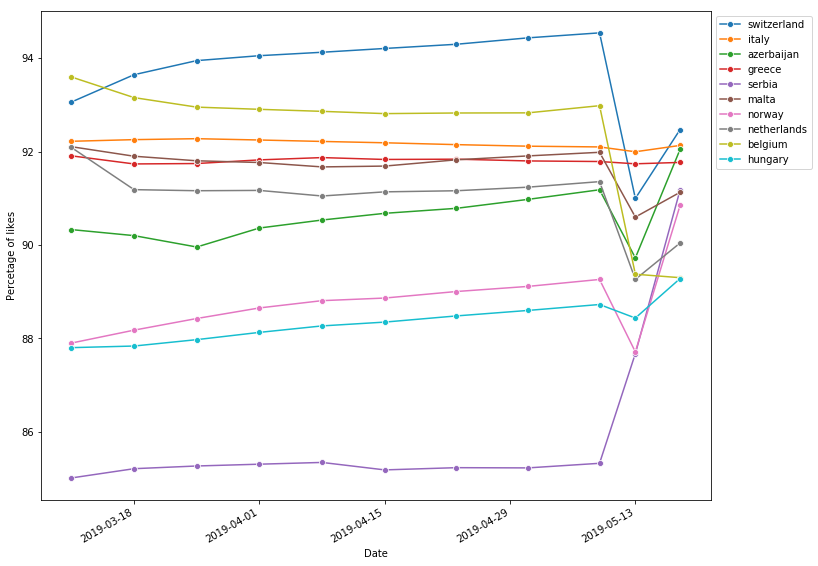

In [8]:
import os
from datetime import datetime

LIMIT = 10

last_date = None
series = []
for path in [path for path in os.listdir('.') 
             if 'top_rated' in path and path.endswith('csv')]:
    date = datetime.strptime(path, 'top_rated_%d%m%Y.csv')
    df = pd.read_csv(path).filter(['country', 'likes_ratio'])
        
    df_dict = df.to_dict()
    countries_dict = df_dict['country']
    ratio_dict = df_dict['likes_ratio']
        
    if last_date is None or last_date < date:
        last_date = date
    data = {
        'date': date, 
    }
    for country_id, ratio in sorted(ratio_dict.items(), key=lambda x: countries_dict[x[0]]):
        data[countries_dict[country_id]] = ratio * 100
    
    serie = pd.Series(data)
    series.append(serie)

history = pd.DataFrame(series)
history = history.set_index(['date'])

print("Last date: {}".format(last_date))
history = history.transpose().sort_values(by=last_date, ascending=False).head(LIMIT).transpose()
# print(history)

g = sns.lineplot(data=history, dashes=False, markers=['o']*history.size)
g.legend(history.loc[last_date].sort_values(ascending=False).index, bbox_to_anchor=(1.0, 1.0))
g.set_ylabel("Percetage of likes")
g.set_xlabel("Date")

plt.gcf().autofmt_xdate()
g.get_figure().set_size_inches(12, 10)

In [9]:
## saving to csv for blog

for path in [path for path in os.listdir('.') 
             if 'top_rated' in path and path.endswith('csv')]:
    date = datetime.strptime(path, 'top_rated_%d%m%Y.csv')
    new_df = pd.read_csv(path)
    new_df = new_df[['country', 'likes', 'dislikes','total_votes','views', 'likes_ratio']]
    new_df = new_df[['country', 'likes', 'dislikes','total_votes','views', 'likes_ratio']]
    new_df.index.names = ['nr']
    new_df['likes_ratio'] = new_df['likes_ratio'].apply(lambda x: "{0:.2f}%".format(x * 100))
    tmp_file = "/tmp/" + os.path.basename(path)
    new_df.to_csv(tmp_file)
    print("Saved {}".format(tmp_file))


Saved /tmp/top_rated_15042019.csv
Saved /tmp/top_rated_18052019.csv
Saved /tmp/top_rated_08042019.csv
Saved /tmp/top_rated_01052019.csv
Saved /tmp/top_rated_13052019.csv
Saved /tmp/top_rated_11032019.csv
Saved /tmp/top_rated_25032019.csv
Saved /tmp/top_rated_01042019.csv
Saved /tmp/top_rated_09052019.csv
Saved /tmp/top_rated_18032019.csv
Saved /tmp/top_rated_23042019.csv


date         2019-04-15  2019-05-18  2019-04-08  2019-05-01  2019-05-13  \
italy          71361954    87163808    67462563    78912633    84276494   
russia          6821179    13882323     6518367     7371240     9343423   
netherlands     6321136    13288003     5818135     7291004     9650291   
france          8489508    12149075     8277621     8892849    10122602   
malta           5064382    11293870     4639133     6100726     8623415   
spain           6862798    10846906     6463643     7597342     8929182   
cyprus          4318704    10054017     3953505     4985634     6930919   
switzerland     3060220     7074855     2738564     3733788     5029697   
greece          3295563     6766307     3074445     3691750     5045913   
poland          2686190     6365763     2566294     2908605     4158149   

date         2019-03-11  2019-03-25  2019-04-01  2019-05-09  2019-03-18  \
italy          46345137    58246374    63325876    82067766    52251101   
russia          3046200 

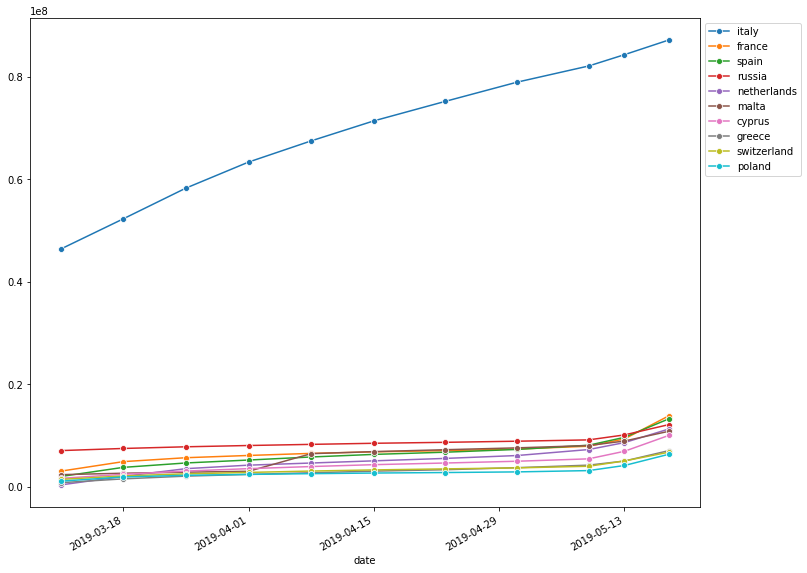

In [10]:
import os
from datetime import datetime

LIMIT = 10


series = []
for path in [path for path in os.listdir('.') 
             if 'top_rated' in path and path.endswith('csv')]:
    date = datetime.strptime(path, 'top_rated_%d%m%Y.csv')
    df = pd.read_csv(path).filter(['country', 'views'])
        
    df_dict = df.to_dict()
    countries_dict = df_dict['country']
    ratio_dict = df_dict['views']
    
    data = {'date': date}
    for country_id, ratio in sorted(ratio_dict.items(), key=lambda x: countries_dict[x[0]]):
        data[countries_dict[country_id]] = ratio
    
    serie = pd.Series(data)
    series.append(serie)

history = pd.DataFrame(series)
history = history.set_index('date')

history = history.transpose().sort_values(by=last_date, ascending=False).head(LIMIT).transpose()
print(history.transpose())

g = sns.lineplot(data=history, dashes=False, markers=['o']*history.size)
g.legend(history.iloc[-1].sort_values(ascending=False).index, bbox_to_anchor=(1.0, 1.0))

# TODO: check if last line is last date!!!
plt.gcf().autofmt_xdate()
g.get_figure().set_size_inches(12, 10)
